## Flickr 8k Dataset

A new benchmark collection for sentence-based image description and search, consisting of 8,000 images that are each paired with five different captions which provide clear descriptions of the salient entities and events. … The images were chosen from six different Flickr groups, and tend not to contain any well-known people or locations, but were manually selected to depict a variety of scenes and situations

[Dataset](https://www.kaggle.com/adityajn105/flickr8k)

[Nice dataloader + Vocab classes](https://www.kaggle.com/mdteach/torch-data-loader-flicker-8k)

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
!pwd

/Users/ihorhrysha/dev/cv_6/caption/notebooks


In [14]:
#reading the text data 
import pandas as pd
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


dataset_dir='../data/flickr8k/'
df = pd.read_csv(os.path.join(dataset_dir, 'captions.txt'))
print(f"There are {len(df)} image to captions")
df.head(5)

There are 40455 image to captions


/var/folders/vh/c7gnvb59713352whdcwz60yc0000gn/T/ipykernel_36299/3462166915.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .


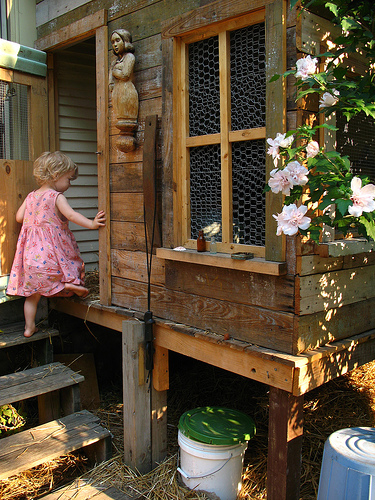

In [11]:
img = Image.open(os.path.join(dataset_dir,'Images',df.iloc[0,0]))
img

## Updated vocab

In [20]:
path_source = "../src"
sys.path.append(path_source)

In [21]:
val_img_count = 500
val_cutoff = len(df)-val_img_count*5

In [27]:
import nltk
def tokenizer(caption:str)-> list[str]:    
    return nltk.tokenize.word_tokenize(str(caption).lower())

In [28]:
from datasets.vocab import VocabularyBuilder, Vocabulary

captions = df[:val_cutoff]['caption'].to_list()
vocab = VocabularyBuilder.build(captions, 5, tokenizer)


[1000/37955] Tokenized the captions.
[2000/37955] Tokenized the captions.
[3000/37955] Tokenized the captions.
[4000/37955] Tokenized the captions.
[5000/37955] Tokenized the captions.
[6000/37955] Tokenized the captions.
[7000/37955] Tokenized the captions.
[8000/37955] Tokenized the captions.
[9000/37955] Tokenized the captions.
[10000/37955] Tokenized the captions.
[11000/37955] Tokenized the captions.
[12000/37955] Tokenized the captions.
[13000/37955] Tokenized the captions.
[14000/37955] Tokenized the captions.
[15000/37955] Tokenized the captions.
[16000/37955] Tokenized the captions.
[17000/37955] Tokenized the captions.
[18000/37955] Tokenized the captions.
[19000/37955] Tokenized the captions.
[20000/37955] Tokenized the captions.
[21000/37955] Tokenized the captions.
[22000/37955] Tokenized the captions.
[23000/37955] Tokenized the captions.
[24000/37955] Tokenized the captions.
[25000/37955] Tokenized the captions.
[26000/37955] Tokenized the captions.
[27000/37955] Tokeniz

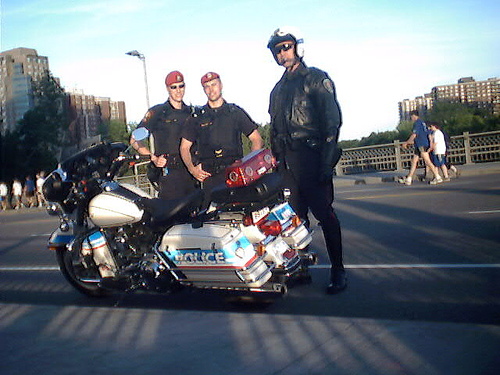

In [31]:
# vocab()
val_captions = df[val_cutoff:]['caption'].to_list()
val_images = df[val_cutoff:]['image'].to_list()

img = Image.open(os.path.join(dataset_dir,'Images',val_images[0]))
img

In [32]:
val_captions[0]

'A police officer posing with two army officers beside his motorcycle .'

In [36]:
token_ids = [vocab(token) for token in tokenizer(val_captions[0]) ]

token_ids

[4, 1074, 2270, 374, 36, 47, 2142, 2726, 833, 79, 1075, 17]

In [38]:
# revert
' '.join([vocab(token_id,return_index=False) for token_id in token_ids])

'a police officer posing with two army officers beside his motorcycle .'

## Custom dataset

In [87]:
from datasets.ds_flickr8k import Flickr8kProvider
data_provider = Flickr8kProvider(path_data = dataset_dir)

Creating new vocab index...
[1000/37955] Tokenized the captions.
[2000/37955] Tokenized the captions.
[3000/37955] Tokenized the captions.
[4000/37955] Tokenized the captions.
[5000/37955] Tokenized the captions.
[6000/37955] Tokenized the captions.
[7000/37955] Tokenized the captions.
[8000/37955] Tokenized the captions.
[9000/37955] Tokenized the captions.
[10000/37955] Tokenized the captions.
[11000/37955] Tokenized the captions.
[12000/37955] Tokenized the captions.
[13000/37955] Tokenized the captions.
[14000/37955] Tokenized the captions.
[15000/37955] Tokenized the captions.
[16000/37955] Tokenized the captions.
[17000/37955] Tokenized the captions.
[18000/37955] Tokenized the captions.
[19000/37955] Tokenized the captions.
[20000/37955] Tokenized the captions.
[21000/37955] Tokenized the captions.
[22000/37955] Tokenized the captions.
[23000/37955] Tokenized the captions.
[24000/37955] Tokenized the captions.
[25000/37955] Tokenized the captions.
[26000/37955] Tokenized the cap

In [88]:
data_iter = iter(data_provider.loader['train'])

In [89]:
batch = next(data_iter)
images, targets, lengths = batch

In [90]:
targets[0]

tensor([   1,   48,   23,  412,    6,  672, 1078,  246,   40,   25,  129,   13,
           4,  229,  130,  234,  388,  265,  202,    4,  409,   17,    2])

In [91]:
lengths[0]

23

In [93]:
images[0].shape

torch.Size([3, 224, 224])

In [94]:
data_provider.dataset['train']

Dataset Flickr8kDataset
    Number of datapoints: 37955
    Root location: ../data/flickr8k/Images
    StandardTransform
Transform: Compose(
               Resize(size=226, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Target transform: Compose(
                      <function tokenize_nltk at 0x1305be430>
                      <function add_start_end at 0x1546a7280>
                      <function caption_to_tensor at 0x14a81cca0>
                  )